In [1]:
import numpy as np
import sys, os
sys.path.append(os.pardir)
import matplotlib.pyplot as plt
from common.layers import *
from common.gradient import numerical_gradient
from ch05.two_layer_net import *
from collections import OrderedDict

In [2]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

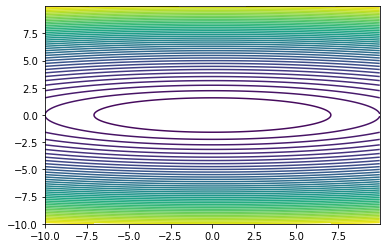

In [3]:
x = np.arange(-10,10,0.01)
y = np.arange(-10,10,0.01)

X, Y = np.meshgrid(x,y)
Z = (X**2)/20 + Y**2
plt.contour(X,Y,Z,levels=50)

In [4]:
def grad(x):
    return np.array([x[0]/20,2*x[1]])

In [5]:
x = np.array([-7.0,2.0])

for i in range(100):
    x -= 1.1 * grad(x)
    print(x)

[-6.615 -2.4  ]
[-6.251175  2.88    ]
[-5.90736037 -3.456     ]
[-5.58245555  4.1472    ]
[-5.2754205 -4.97664  ]
[-4.98527237  5.971968  ]
[-4.71108239 -7.1663616 ]
[-4.45197286  8.59963392]
[ -4.20711435 -10.3195607 ]
[-3.97572306 12.38347284]
[ -3.75705829 -14.86016741]
[-3.55042009 17.8322009 ]
[ -3.35514698 -21.39864108]
[-3.1706139  25.67836929]
[ -2.99623013 -30.81404315]
[-2.83143748 36.97685178]
[ -2.67570842 -44.37222213]
[-2.52854445 53.24666656]
[ -2.38947451 -63.89599987]
[-2.25805341 76.67519985]
[ -2.13386047 -92.01023982]
[ -2.01649815 110.41228778]
[  -1.90559075 -132.49474534]
[ -1.80078326 158.99369441]
[  -1.70174018 -190.79243329]
[ -1.60814447 228.95091995]
[  -1.51969652 -274.74110393]
[ -1.43611321 329.68932472]
[  -1.35712699 -395.62718967]
[ -1.282485  474.7526276]
[  -1.21194833 -569.70315312]
[ -1.14529117 683.64378374]
[  -1.08230016 -820.37254049]
[ -1.02277365 984.44704859]
[-9.66521096e-01 -1.18133646e+03]
[-9.13362436e-01  1.41760375e+03]
[-8.63127502e-

In [6]:
### 모멘텀
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key,val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

In [7]:
### AdaGrad
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

In [8]:
### Adam
class Adam:
    def __init__(self, lr=0.01, b1=0.9, b2=0.999):
        self.lr = lr
        self.b1 = b1
        self.b2 = b2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key], self.v[key] = np.zeros_like(val), np.zeros_like(val)
                
        self.iter += 1
        lr_t = self.lr * np.sqrt(1.0 - self.b2 ** self.iter) / (1.0 - self.b1 ** self.iter)
        
        for key in params.keys():
            self.m[key] += (1.0 - self.b1) * (grads[key] - self.m[key])
            self.v[key] += (1.0 - self.b2) * (grads[key]**2 - self.v[key])
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

### 6.1.7 어느 방법을 이용할 것인가?

In [9]:
def f(x,y):
    return (x**2)/20.0 + y**2

In [10]:
def df(x,y):
    return x/10.0, 2*y

In [11]:
init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0

In [12]:
optimizers = OrderedDict()
optimizers['SGD'] = SGD(lr=0.95)
optimizers['Momentum'] = Momentum(lr=0.1)
optimizers['AdaGrad'] = AdaGrad(lr=1.5)
optimizers['Adam'] = Adam(lr=0.3)

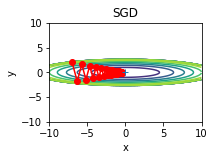

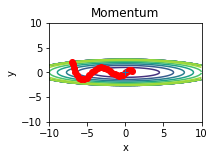

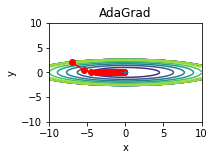

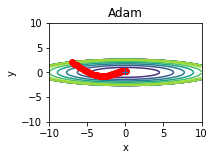

In [13]:
for key in optimizers:
    optimizer = optimizers[key]
    params['x'], params['y'] = init_pos[0], init_pos[1]
    x_history = []
    y_history = []
    idx = 1

    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])

        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)

    X, Y = np.meshgrid(x,y)
    Z = f(X,Y)

    mask = Z > 7
    Z[mask] = 0

    plt.subplot(2,2,idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color='red')
    plt.contour(X,Y,Z)
    plt.ylim(-10,10)
    plt.xlim(-10,10)
    plt.plot(0,0,'+')
    plt.title(key)
    plt.xlabel('x')
    plt.ylabel('y')

    plt.show()

In [14]:
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import smooth_curve

In [15]:
(x_train, t_train), (x_test, t_test) = load_mnist(one_hot_label=True)

In [16]:
train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

In [17]:
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()

====== iteration0 ======
SGD : 2.4813178528515794
Momentum : 2.3641733566368925
AdaGrad : 2.2117596364571073
Adam : 2.0230757264517996
====== iteration100 ======
SGD : 1.607487670196167
Momentum : 0.3100210328449863
AdaGrad : 0.13956872551701982
Adam : 0.21208553891008652
====== iteration200 ======
SGD : 0.8759229871890866
Momentum : 0.1610497912632603
AdaGrad : 0.05369946082261693
Adam : 0.11512611239566804
====== iteration300 ======
SGD : 0.5448585458596102
Momentum : 0.1832881121450124
AdaGrad : 0.11704898531901653
Adam : 0.1988046662299073
====== iteration400 ======
SGD : 0.5498173374177622
Momentum : 0.278758505549616
AdaGrad : 0.09062171672752806
Adam : 0.18895087050463175
====== iteration500 ======
SGD : 0.35485620638173077
Momentum : 0.16640866419337944
AdaGrad : 0.0591450637919259
Adam : 0.09606904466445983
====== iteration600 ======
SGD : 0.3215843091502099
Momentum : 0.12033952983504917
AdaGrad : 0.048319557887867834
Adam : 0.10525013675690578
====== iteration700 ======
SGD 

<function matplotlib.pyplot.show(close=None, block=None)>

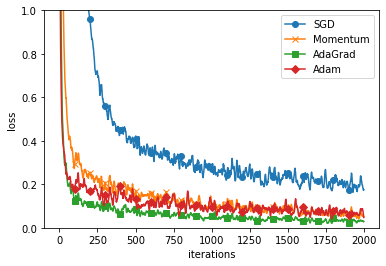

In [18]:
networks = {}
train_loss = {}

for key in optimizers.keys():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                         output_size=10)
    train_loss[key] = []

for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
        
    if i % 100 == 0:
        print(f'====== iteration{i} ======')
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(f'{key} : {loss}')
    
markers = {'SGD' : 'o', 'Momentum' : 'x', 'AdaGrad' : 's', 'Adam' : 'D'}    
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker = markers[key], markevery=100, label=key)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.ylim(0,1)
plt.legend()
plt.show

In [19]:
train_loss['SGD']

[2.4813178528515794,
 2.469470904416731,
 2.3812041529258647,
 2.352262819197475,
 2.3235724889427685,
 2.362072086916398,
 2.3010231918357826,
 2.3032103443320073,
 2.380227715446229,
 2.3130252130372204,
 2.317618976769771,
 2.301922758313817,
 2.322250336130454,
 2.297420119215846,
 2.304734007163386,
 2.2882267140981725,
 2.258085531083464,
 2.3048263978305235,
 2.259365667959488,
 2.255096694787201,
 2.282850624150401,
 2.260670520731951,
 2.247805083181833,
 2.21580895767908,
 2.2554514417311617,
 2.2303278365325907,
 2.157998590250572,
 2.1773402103446897,
 2.2016489849961225,
 2.2132833609937217,
 2.157300579936598,
 2.208457331454551,
 2.180676301560113,
 2.1591538685670923,
 2.169442405780817,
 2.182357516855368,
 2.13640077335746,
 2.1349211670992596,
 2.1385689748304997,
 2.1354797475524103,
 2.1204840170491117,
 2.1089061195744643,
 2.136998743944961,
 2.086082421830625,
 2.124049857978665,
 2.096303818953337,
 2.0959296504687073,
 2.063495302277688,
 2.068241124943371,
 2

<function matplotlib.pyplot.show(close=None, block=None)>

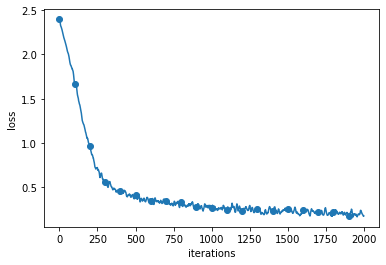

In [20]:
x = np.arange(max_iterations)
plt.plot(x, smooth_curve(train_loss['SGD']), marker = 'o', markevery=100, label='SGD')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show

### 6.2 가중치의 초깃값

In [21]:
### 은닉층의 활성화값 분포
def sigmoid(x):
    return 1 / (1+np.exp(-x))

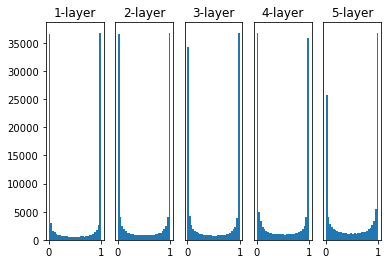

In [22]:
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 1
    a = np.dot(x,w)
    z = sigmoid(a)
    
    activations[i] = z

    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(f'{i+1}-layer')
    if i != 0:
        plt.yticks([],[])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [23]:
len(activations)

5

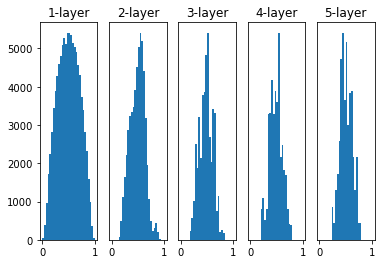

In [24]:
### 가중치의 표준편차 0.1
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 0.1
    a = np.dot(x,w)
    z = sigmoid(a)
    
    activations[i] = z

    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(f'{i+1}-layer')
    if i != 0:
        plt.yticks([],[])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

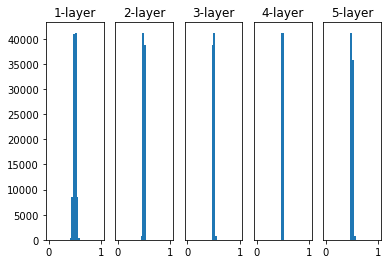

In [25]:
### 가중치의 표준편차 0.01
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x,w)
    z = sigmoid(a)
    
    activations[i] = z

    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(f'{i+1}-layer')
    if i != 0:
        plt.yticks([],[])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

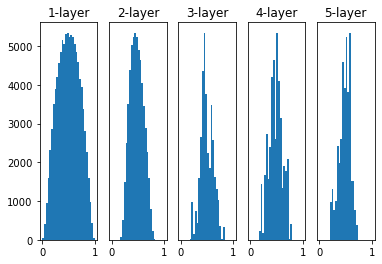

In [26]:
### Xavier 초깃값
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x,w)
    z = sigmoid(a)
    
    activations[i] = z

    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(f'{i+1}-layer')
    if i != 0:
        plt.yticks([],[])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [27]:
def tanh(x):
    return np.tanh(x)

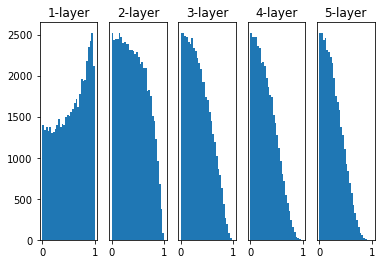

In [28]:
### Xavier 초깃값과 tanh 함수 사용
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x,w)
    z = tanh(a)
    
    activations[i] = z

    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(f'{i+1}-layer')
    if i != 0:
        plt.yticks([],[])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [29]:
def Relu(x):
    return np.maximum(0,x)

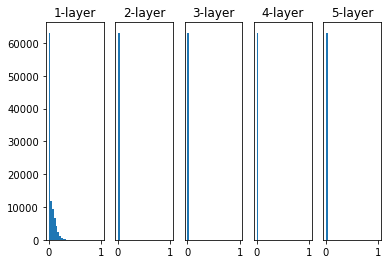

In [30]:
### ReLU 함수 사용
### 가중치의 표준편차 0.01
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x,w)
    z = relu(a)
    
    activations[i] = z

    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(f'{i+1}-layer')
    if i != 0:
        plt.yticks([],[])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

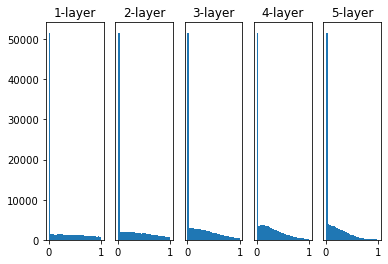

In [31]:
### Xavier 초깃값
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x,w)
    z = relu(a)
    
    activations[i] = z

    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(f'{i+1}-layer')
    if i != 0:
        plt.yticks([],[])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

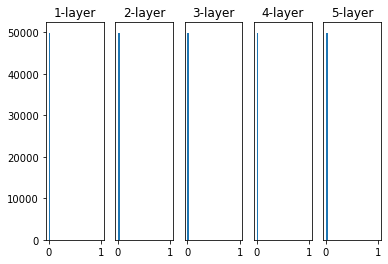

In [32]:
### He 초깃값
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) / np.sqrt(2.0 / node_num)
    a = np.dot(x,w)
    z = relu(a)
    
    activations[i] = z

    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(f'{i+1}-layer')
    if i != 0:
        plt.yticks([],[])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

### 6.2.4 MNIST 데이터셋으로 본 가중치 초깃값 비교

In [33]:
(x_train, t_train), (x_test, t_test) = load_mnist(one_hot_label=True, flatten=True, normalize=True)

In [34]:
train_size = x_train.shape[0]
batch_size = 128
max_iteration = 2000

====== iteration0 ======
std=0.01 : 2.302496432277091
Xavier : 2.3065041241584927
He : 2.3594196336670716
====== iteration100 ======
std=0.01 : 2.3021827332715947
Xavier : 2.2551085439399445
He : 1.3343567981782964
====== iteration200 ======
std=0.01 : 2.301196901203601
Xavier : 2.160102737558347
He : 0.8759742749113109
====== iteration300 ======
std=0.01 : 2.3010575079829296
Xavier : 1.9330886830252973
He : 0.50297172059944
====== iteration400 ======
std=0.01 : 2.303941008596556
Xavier : 1.4806463647055745
He : 0.41133652183378766
====== iteration500 ======
std=0.01 : 2.300173790612539
Xavier : 0.9846733774357271
He : 0.41928113160467284
====== iteration600 ======
std=0.01 : 2.301305368656421
Xavier : 0.700646635254615
He : 0.3345254249817555
====== iteration700 ======
std=0.01 : 2.3058399037039945
Xavier : 0.6438411726179847
He : 0.39471885367483006
====== iteration800 ======
std=0.01 : 2.302499494138421
Xavier : 0.5827988358967906
He : 0.3314235704197019
====== iteration900 ======
s

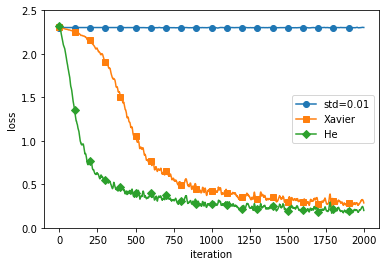

In [39]:
weight_init_type = {'std=0.01' : 0.01, 'Xavier' : 'sigmoid', 'He' : 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}


for key, weight_type in weight_init_type.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100,100,100,100], 
                                      output_size=10, weight_init_std=weight_type)
    train_loss[key] = []
    
    
for i in range(max_iteration):
    mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[mask]
    t_batch = t_train[mask]

    for key in weight_init_type.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
        
    if i % 100 == 0:
        print(f'====== iteration{i} ======')
        for key in weight_init_type.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(f'{key} : {loss}')
        
        
markers = {'std=0.01' : 'o', 'Xavier' : 's', 'He' : 'D'}        
x = np.arange(max_iteration)
for key in weight_init_type.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.ylim(0.0, 2.5)
plt.legend()
plt.show()

In [ ]:
for i in range(max_iteration):
    mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[mask]
    t_batch = t_train[mask]

    grads = networks['Xavier'].gradient(x_batch, t_batch)
    optimizer.update(networks['Xavier'].params, grads)

    loss = networks['Xavier'].loss(x_batch, t_batch)
    train_loss['Xavier'].append(loss)

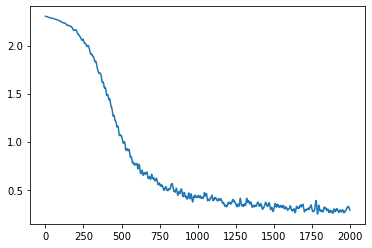

In [40]:
x = np.arange(max_iteration)
len(train_loss['Xavier'])
plt.plot(x, smooth_curve(train_loss['Xavier']))

In [52]:
from common.multi_layer_net_extend import MultiLayerNetExtend

In [53]:
(x_train, t_train), (x_test, t_test) = load_mnist(one_hot_label=True, flatten=True, normalize=True)

In [54]:
x_train = x_train[:1000]
t_train = t_train[:1000]

In [55]:
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
max_epochs = 20

In [56]:
### 배치 정규화
def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100,100,100,100], output_size=10,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100,100,100,100], output_size=10, 
                                  weight_init_std=weight_init_std, use_batchnorm=False)
    optimizer = SGD(lr=0.01)

    iter_per_epoch = max(train_size / batch_size, 1)
    
    epoch_cnt = 0
    train_acc_list = []
    bn_train_acc_list = []


    for i in range(2000):
        mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[mask]
        t_batch = t_train[mask]

        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            bn_train_acc_list.append(bn_train_acc)

            # print(f'epoch: {epoch_cnt} | {train_acc} - {bn_train_acc}')
            epoch_cnt += 1

            if epoch_cnt >= max_epochs:
                break
    return train_acc_list, bn_train_acc_list

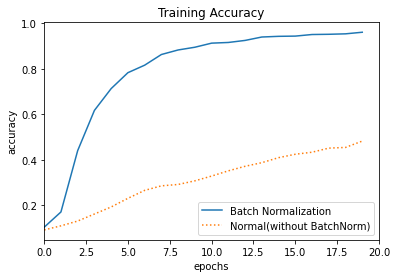

In [57]:
### Xavier 초깃값 사용
train_acc_list, bn_train_acc_list = __train('sigmoid')
x = np.arange(max_epochs)
plt.plot(x, bn_train_acc_list, label='Batch Normalization')
plt.plot(x, train_acc_list, linestyle='dotted', label='Normal(without BatchNorm)')
plt.xlim(0,20)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training Accuracy')
plt.legend()

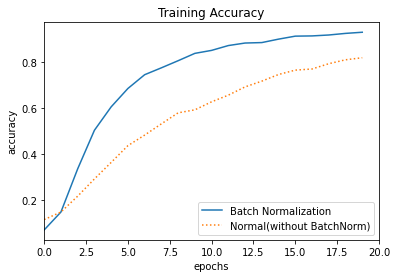

In [58]:
### He 초깃값 사용
x = np.arange(max_epochs)
train_acc_list, bn_train_acc_list = __train('relu')
plt.plot(x, bn_train_acc_list, label='Batch Normalization')
plt.plot(x, train_acc_list, linestyle='dotted', label='Normal(without BatchNorm)')
plt.xlim(0,20)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training Accuracy')
plt.legend()

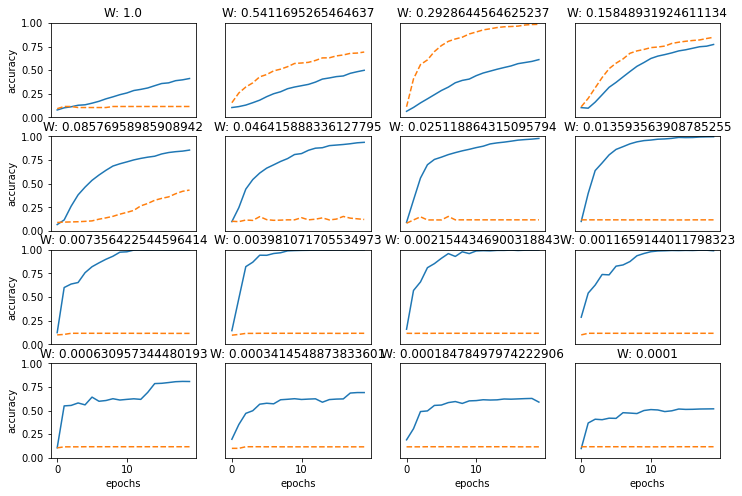

In [59]:
### 초깃값 분포를 다양하게 주면서 비교
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

fig = plt.figure(figsize=(12,8))

for i,w in enumerate(weight_scale_list):
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title(f'W: {w}')
        
    plt.plot(x, bn_train_acc_list, markevery=2)
    plt.plot(x, train_acc_list, linestyle='--', markevery=2)
        
    plt.ylim(0,1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel('accuracy')
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel('epochs')
    
plt.show()

In [60]:
### 일부러 오버피팅 발생
(x_train, t_train), (x_test, t_test) = load_mnist(one_hot_label=True, normalize=True, flatten=True)

In [61]:
x_train = x_train[:300]
t_train = t_train[:300]

In [62]:
network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100,100,100,100,100,100], output_size=10)
optimizer = SGD()

In [63]:
max_epoch = 200
batch_size = 100
train_size = x_train.shape[0]

train_acc_list = []
test_acc_list = []

epoch_cnt = 0
iter_per_epoch = max(train_size/batch_size, 1)

for i in range(1000):
    mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[mask]
    t_batch = t_train[mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
    
        epoch_cnt += 1
        if epoch_cnt >= max_epoch:
            break

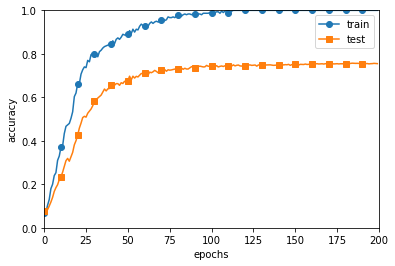

In [64]:
### 오버피팅의 결과
x = np.arange(max_epoch)
plt.plot(x, train_acc_list, marker='o', markevery=10, label = 'train')
plt.plot(x, test_acc_list, marker='s', markevery=10, label = 'test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.xlim(0,200)
plt.ylim(0,1.0)
plt.legend()
plt.show()

In [65]:
### 가중치 감소
network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100,100,100,100,100,100], output_size=10, 
                              weight_decay_lambda=0.1)
optimizer = SGD()

In [66]:
max_epoch = 200
batch_size = 100
train_size = x_train.shape[0]

train_acc_list = []
test_acc_list = []

epoch_cnt = 0
iter_per_epoch = max(train_size/batch_size, 1)

for i in range(1000):
    mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[mask]
    t_batch = t_train[mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
    
        epoch_cnt += 1
        if epoch_cnt >= max_epoch:
            break

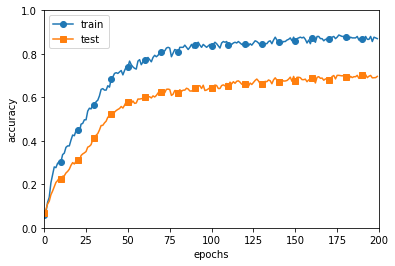

In [67]:
x = np.arange(max_epoch)
plt.plot(x, train_acc_list, marker='o', markevery=10, label = 'train')
plt.plot(x, test_acc_list, marker='s', markevery=10, label = 'test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.xlim(0,200)
plt.ylim(0,1.0)
plt.legend()
plt.show()

In [68]:
### 드롭아웃
class DropOut:
    def __init__(self, dropout_ratio):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, x, train_flg = True):
        if train_flg:
            self.mask = np.random.randn(*x.shape) > self.dropout_ratio
            return x * self.mask
        
        else:
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self, dout):
        return dout * self.mask

In [69]:
do_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100,100,100,100,100,100], output_size=10, 
                    use_dropout=True, dropout_ration=0.15)
network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100,100,100,100,100,100], output_size=10)
optimizer = SGD()

In [70]:
max_epoch = 300
batch_size = 100
train_size = x_train.shape[0]

train_acc_list = []
test_acc_list = []
do_train_acc_list = []
do_test_acc_list = []

epoch_cnt = 0
iter_per_epoch = max(train_size/batch_size, 1)


for i in range(100000000):
    mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[mask]
    t_batch = t_train[mask]

    for _network in (do_network, network):
        grads = _network.gradient(x_batch, t_batch)
        optimizer.update(_network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        train_acc_list.append(train_acc)
        test_acc = network.accuracy(x_test, t_test)
        test_acc_list.append(test_acc)
        
        
        do_train_acc = do_network.accuracy(x_train, t_train)
        do_train_acc_list.append(do_train_acc)
        do_test_acc = do_network.accuracy(x_test, t_test)
        do_test_acc_list.append(do_test_acc)

        # print(f'epoch: {epoch_cnt} | {train_acc} - {bn_train_acc}')
        epoch_cnt += 1

        if epoch_cnt >= max_epoch:
            break

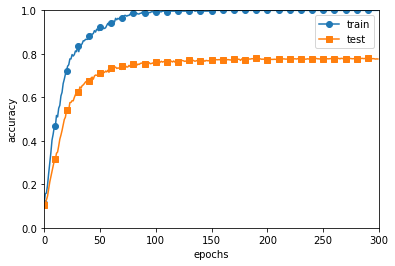

In [71]:
x = np.arange(max_epoch)
plt.plot(x, train_acc_list, marker='o', markevery=10, label = 'train')
plt.plot(x, test_acc_list, marker='s', markevery=10, label = 'test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.xlim(0,300)
plt.ylim(0,1.0)
plt.legend()
plt.show()

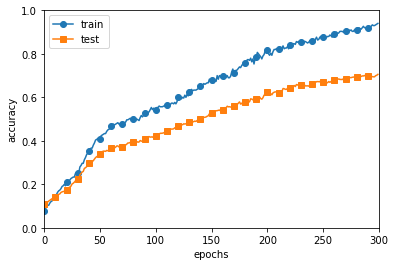

In [72]:
x = np.arange(max_epoch)
plt.plot(x, do_train_acc_list, marker='o', markevery=10, label = 'train')
plt.plot(x, do_test_acc_list, marker='s', markevery=10, label = 'test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.xlim(0,300)
plt.ylim(0,1.0)
plt.legend()
plt.show()

In [137]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, one_hot_label=True, normalize=True)

In [138]:
### 검증데이터 분리
x_train[:500]
t_train[:500]

perm = np.random.permutation(x_train.shape[0])
x_train = x_train[perm]
t_train = t_train[perm]

val_num = int(x_train.shape[0] * 0.2)
x_val = x_train[:val_num]
t_val = t_train[:val_num]
x_train = x_train[val_num:]
t_train = t_train[val_num:]

In [ ]:
lr = 10 ** np.random.uniform(-6, -2)
weight_decay = 10 ** np.random.uniform(-8, -4)

In [139]:
network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100,100,100,100,100,100], output_size=10,
                   weight_decay_lambda=weight_decay)
optimizer = SGD(lr=lr)

In [140]:
def __train(lr, weight_decay):
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100,100,100,100,100,100], output_size=10,
                       weight_decay_lambda=weight_decay)
    optimizer = SGD(lr=lr)

    train_size = x_train.shape[0]
    batch_size = 100
    max_epoch = 250
    epoch_cnt = 0

    train_acc_list = []
    val_acc_list = []

    for i in range(10000000):
        mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[mask]
        t_batch = t_train[mask]

        grads = network.gradient(x_batch, t_batch)
        optimizer.update(network.params, grads)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            val_acc = network.accuracy(x_val, t_val)
            train_acc_list.append(train_acc)
            val_acc_list.append(val_acc)

            epoch_cnt += 1

            if epoch_cnt >= max_epoch:
                break
                
    return train_acc_list, val_acc_list

In [142]:
optimization_trial = 100
results_train = {}
results_val = {}

for _ in range(optimization_trial):
    lr = 10 ** np.random.uniform(-6, -2)
    weight_decay = 10 ** np.random.uniform(-8, -4)

    train_acc_list, val_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = f'lr : {lr}, weight_decay : {weight_decay}'
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

KeyboardInterrupt: 

In [ ]:
results_val, results_train

In [ ]:
x = np.arange(len(val_acc_list))
plt.plot(x, val_acc_list)
plt.plot(x, train_acc_list, '--')

In [151]:
from common.util import shuffle_dataset
from common.trainer import Trainer

In [152]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, one_hot_label=True, normalize=True)

In [153]:
x_train = x_train[:500]
t_train = t_train[:500]

In [154]:
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

In [155]:
def __train(lr, weight_decay, epochs=50):
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100,100,100,100,100,100], output_size=10,
                                     weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val, epochs=50,
           mini_batch_size=100, optimizer='sgd', optimizer_param={'lr':lr},
           verbose=False)
    trainer.train()
    return trainer.test_acc_list, trainer.train_acc_list

In [148]:
optimization_trial = 100
results_val = {}
results_train = {}

for _ in range(optimization_trial):
    lr = 10 ** np.random.uniform(-6, -2)
    weight_decay = 10 ** np.random.uniform(-8, -4)
    
    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = f'lr: {lr}, weight decay: {weight_decay}'
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

val acc:0.14 | lr:2.6457047945318886e-05, weight decay:2.889297987343211e-07
val acc:0.69 | lr:0.005121567800646021, weight decay:9.021751198276343e-05
val acc:0.56 | lr:0.004599416367431475, weight decay:1.70091149673906e-08
val acc:0.08 | lr:2.937903304610638e-06, weight decay:1.7990723984036664e-05
val acc:0.1 | lr:2.5856597258500955e-05, weight decay:2.5741488955801535e-08
val acc:0.13 | lr:2.4573644859222207e-05, weight decay:1.5642819791386525e-06
val acc:0.13 | lr:0.00013976611491812177, weight decay:8.577862788466663e-08
val acc:0.07 | lr:2.1616657666929387e-06, weight decay:1.8901247936661672e-06
val acc:0.62 | lr:0.0055358223136172625, weight decay:2.2696786642742662e-05
val acc:0.14 | lr:0.00026120854424802433, weight decay:1.617926836253273e-06
val acc:0.51 | lr:0.0033163606091652937, weight decay:5.9700045269910814e-05
val acc:0.59 | lr:0.004484468017812417, weight decay:6.992649846058391e-07
val acc:0.12 | lr:4.9908259347547226e-05, weight decay:1.0852194604561388e-06
val

Best-1(val acc:0.79) | lr: 0.007648043493929348, weight decay: 6.199948848486744e-07
Best-2(val acc:0.76) | lr: 0.006527324322399367, weight decay: 1.051756195746836e-06
Best-3(val acc:0.75) | lr: 0.00636544248647874, weight decay: 7.9838792616409e-07
Best-4(val acc:0.75) | lr: 0.007984632883427848, weight decay: 1.3296578601510054e-08
Best-5(val acc:0.7) | lr: 0.006175475834027774, weight decay: 4.491985173699082e-08
Best-6(val acc:0.69) | lr: 0.005121567800646021, weight decay: 9.021751198276343e-05
Best-7(val acc:0.68) | lr: 0.006518627061467082, weight decay: 4.0251529128978756e-06
Best-8(val acc:0.62) | lr: 0.0055358223136172625, weight decay: 2.2696786642742662e-05
Best-9(val acc:0.59) | lr: 0.004484468017812417, weight decay: 6.992649846058391e-07
Best-10(val acc:0.57) | lr: 0.005210921647855883, weight decay: 3.727467084742812e-07
Best-11(val acc:0.56) | lr: 0.004599416367431475, weight decay: 1.70091149673906e-08
Best-12(val acc:0.51) | lr: 0.0033163606091652937, weight decay:

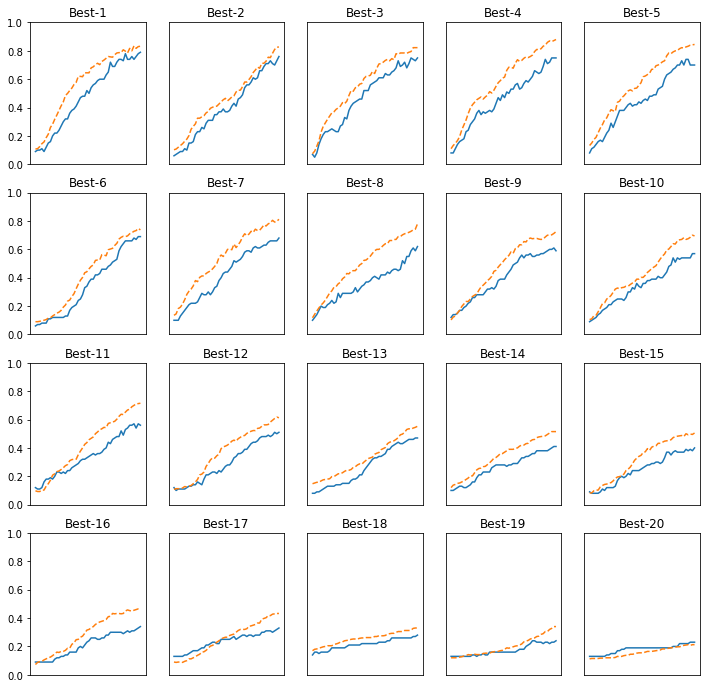

In [149]:
i = 0
fig = plt.figure(figsize=(12,12))

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(4,5,i+1)
    plt.title(f'Best-{i+1}')
    plt.ylim(0,1.0)
    if i % 5:
        plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], '--')
    i += 1
    
    if i >= 20:
        break
        
plt.show()

In [156]:
### 하이퍼파라미터 범위 조정
optimization_trial = 100
results_val = {}
results_train = {}

for _ in range(optimization_trial):
    lr = 10 ** np.random.uniform(-3, -2)
    weight_decay = 10 ** np.random.uniform(-8, -7)
    
    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = f'lr: {lr}, weight decay: {weight_decay}'
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

val acc:0.76 | lr:0.009904875122222052, weight decay:6.023887989003301e-08
val acc:0.57 | lr:0.0036843091414639055, weight decay:8.681449521326244e-08
val acc:0.18 | lr:0.001614279002452536, weight decay:1.2766231000361988e-08
val acc:0.7 | lr:0.0062902807779362776, weight decay:1.664333108781055e-08
val acc:0.39 | lr:0.0026660257735529468, weight decay:4.2946603419967534e-08
val acc:0.67 | lr:0.004930859380766097, weight decay:2.041618405348792e-08
val acc:0.34 | lr:0.0025762397994771404, weight decay:9.18645568792859e-08
val acc:0.43 | lr:0.005418804190407771, weight decay:1.6136965069960802e-08
val acc:0.49 | lr:0.0032126892600593156, weight decay:3.0554815481481455e-08
val acc:0.78 | lr:0.007756117415453597, weight decay:7.647696658018682e-08
val acc:0.8 | lr:0.007016774779933256, weight decay:1.5995755883559567e-08
val acc:0.39 | lr:0.00232391215061365, weight decay:1.7721673737795594e-08
val acc:0.21 | lr:0.0014883538091496609, weight decay:9.421491435587553e-08
val acc:0.68 | lr

Best-1(val acc:0.81) | lr: 0.007797634814999151, weight decay: 1.538188165891717e-08
Best-2(val acc:0.81) | lr: 0.00919090804675147, weight decay: 8.876528585689024e-08
Best-3(val acc:0.8) | lr: 0.007016774779933256, weight decay: 1.5995755883559567e-08
Best-4(val acc:0.78) | lr: 0.007756117415453597, weight decay: 7.647696658018682e-08
Best-5(val acc:0.78) | lr: 0.007260407799210338, weight decay: 1.2733303130311653e-08
Best-6(val acc:0.78) | lr: 0.00968981673543112, weight decay: 6.618890488081097e-08
Best-7(val acc:0.77) | lr: 0.006211184655100349, weight decay: 4.9980936564994556e-08
Best-8(val acc:0.77) | lr: 0.00598680914412987, weight decay: 3.295368722011843e-08
Best-9(val acc:0.77) | lr: 0.00986653176183082, weight decay: 8.861349801307419e-08
Best-10(val acc:0.77) | lr: 0.006286783760893262, weight decay: 7.065225947410469e-08
Best-11(val acc:0.77) | lr: 0.009150632471205667, weight decay: 3.9957594749115855e-08
Best-12(val acc:0.77) | lr: 0.00666276119449115, weight decay: 2

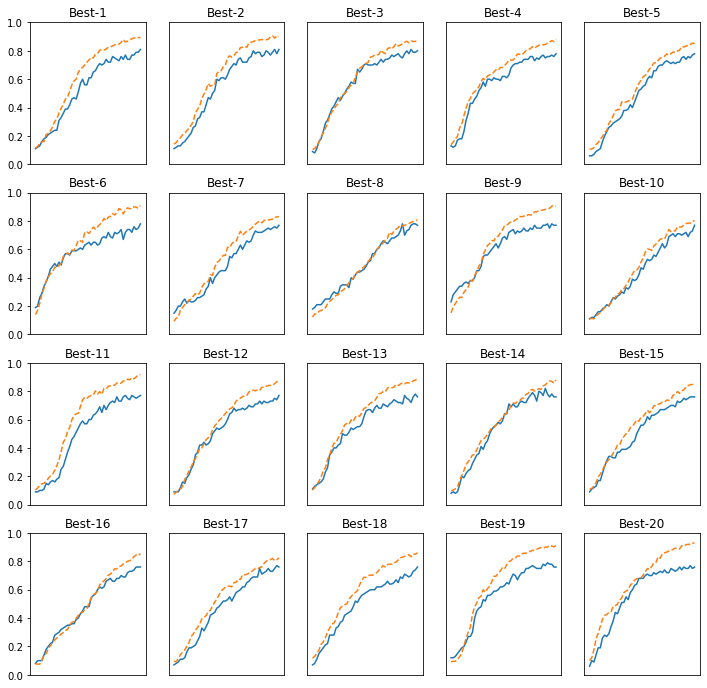

In [157]:
i = 0
fig = plt.figure(figsize=(12,12))

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(4,5,i+1)
    plt.title(f'Best-{i+1}')
    plt.ylim(0,1.0)
    if i % 5:
        plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], '--')
    i += 1
    
    if i >= 20:
        break
        
plt.show()

### lr = 0.001/ 0.01, weight_decay = 10 ** (-8) 정도가 좋아보임

In [168]:
x_train.shape

(400, 784)

In [170]:
network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100,100,100,100,100,100], output_size=10,
                   weight_decay_lambda=10**(-8))
optimizer = SGD(lr=0.001)

In [174]:
max_epoch = 300
batch_size = 100
train_size = x_train.shape[0]

train_acc_list = []
test_acc_list = []

epoch_cnt = 0
iter_per_epoch = max(train_size/batch_size, 1)

for i in range(1000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

        
    if i % iter_per_epoch == 0:
        test_acc = network.accuracy(x_test, t_test)
        test_acc_list.append(test_acc)
        
        epoch_cnt += 1

        if epoch_cnt >= max_epoch:
            break

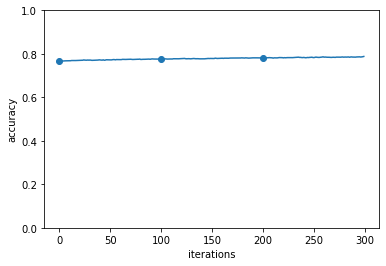

In [175]:
x = np.arange(max_epoch)
plt.plot(x, test_acc_list, marker = 'o', markevery=100)
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.ylim(0,1)
plt.show()

In [111]:
x=[1,2,3,4,5]
sorted(x, reverse=True)

[1, 2, 3, 4, 5]

In [131]:
sorted(results_val.items(), key=lambda x: x[1][-1], reverse=True)

[('lr: 0.008245878456846507, weight decay: 1.6227750515763124e-07',
  [0.06,
   0.07,
   0.07,
   0.1,
   0.12,
   0.12,
   0.13,
   0.15,
   0.21,
   0.21,
   0.22,
   0.23,
   0.25,
   0.32,
   0.34,
   0.35,
   0.35,
   0.37,
   0.37,
   0.38,
   0.38,
   0.4,
   0.43,
   0.44,
   0.46,
   0.44,
   0.48,
   0.51,
   0.49,
   0.5,
   0.52,
   0.54,
   0.56,
   0.57,
   0.56,
   0.56,
   0.58,
   0.6,
   0.61,
   0.61,
   0.63,
   0.65,
   0.66,
   0.63,
   0.65,
   0.67,
   0.65,
   0.69,
   0.69,
   0.71]),
 ('lr: 0.008228118069035974, weight decay: 1.0024826025738074e-06',
  [0.1,
   0.09,
   0.09,
   0.13,
   0.14,
   0.14,
   0.18,
   0.18,
   0.23,
   0.23,
   0.27,
   0.29,
   0.35,
   0.36,
   0.39,
   0.4,
   0.42,
   0.43,
   0.45,
   0.45,
   0.45,
   0.46,
   0.48,
   0.51,
   0.49,
   0.51,
   0.51,
   0.52,
   0.54,
   0.55,
   0.55,
   0.55,
   0.58,
   0.54,
   0.58,
   0.6,
   0.59,
   0.59,
   0.6,
   0.6,
   0.59,
   0.58,
   0.61,
   0.67,
   0.64,
   0.63,
   0.68

In [104]:
results_val.values()

dict_values([[0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11], [0.12, 0.13, 0.13, 0.13, 0.13, 0.14, 0.16, 0.17, 0.19, 0.19, 0.2, 0.2, 0.2, 0.22, 0.23, 0.23, 0.23, 0.22, 0.23, 0.23, 0.23, 0.24, 0.24, 0.24, 0.25, 0.25, 0.26, 0.25, 0.27, 0.26, 0.27, 0.28, 0.27, 0.27, 0.27, 0.26, 0.27, 0.27, 0.28, 0.29, 0.29, 0.29, 0.29, 0.29, 0.28, 0.29, 0.28, 0.28, 0.28, 0.27], [0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11], [0.11, 0.11, 0.11, 0.11, 0.11, 0.12, 0.13, 0.13, 0.14, 0.14, 0.13, 0.12, 0.13, 0.13,